<a href="https://colab.research.google.com/github/mdaugherity/MachineLearning2024/blob/main/tutorial/Tutorial_04_First_Look_at_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dr. Daugherity, Abilene Christian University, PHYS 453**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
import pandas as pd
from matplotlib.colors import ListedColormap

# Tutorial 4 - First Look at Data

scikit-learn comes with a few small standard datasets that do not require to download any file from some external website.

Name | Description
-----|------------
load_boston | Load and return the boston house-prices dataset (regression).
load_iris | Load and return the iris dataset (classification).
load_diabetes | Load and return the diabetes dataset (regression).
load_digits  | Load and return the digits dataset (classification).
load_linnerud | Load and return the linnerud dataset (multivariate regression).
load_wine | Load and return the wine dataset (classification).
load_breast_cancer | Load and return the breast cancer wisconsin dataset (classification).

These datasets are useful to quickly illustrate the behavior of the various algorithms implemented in the scikit.

**References**

*   scikit-learn User's Guide: https://scikit-learn.org/stable/datasets.html
*   Iris Data: https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset
*   Iris Example: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html




# The Iris Dataset


Load as a [pandas dataframe](https://pandas.pydata.org/docs/user_guide/index.html) for easy viewing
*  Each row is a sample (an iris flower)
*  The first 4 columns are **FEATURES**: data that characterize a sample
*  The last column is the **TARGET**: a number representing our classification goal, here we have 3 different species (0=setosa, 1=versicolor, 2=virginica)

Our job will be to build a **CLASSIFIER** from the training data that can examine the features to tell which target (species) an iris belongs to.

In [ ]:
data = datasets.load_iris(as_frame=True)
data.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


This lovely spreadsheet-looking-table is from pandas.  We will learn about this lovely tool later.  

Now that we've seen it, let's reload the data as numpy arrays.

The data comes in a **bunch** format, see https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html#sklearn.utils.Bunch

In [ ]:
data_bunch = datasets.load_iris()
data_bunch.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

The DESCR has a long block of explanatory text

In [ ]:
print(data_bunch.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

The input features are stored in the **data** and **feature_names** keys.

We always load the data in a variable named (capital) X

In [ ]:
X = data_bunch.data  # load features
X.shape

(150, 4)

In [ ]:
X[:5] # the first 5 flowers

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
data_bunch.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Similarly, the classifier's output is the **target** and **target_names**.

We always save these in the variable y

In [ ]:
y = data_bunch.target  # load targets
y.shape

(150,)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
print('The targets are: ',np.unique(y))

The targets are:  [0 1 2]


In [ ]:
print(data_bunch.target_names)

['setosa' 'versicolor' 'virginica']


We could also have loaded this in one go using:


```
X,y = datasets.load_iris(return_X_y=True)  # load iris data as numpy arrays
```



# Reading the Data
X and y are numpy arrays.  Here's a few of the useful things we can do


In [ ]:
X[:,0]   # first feature, all species

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [ ]:
X[ y==0 ].shape  # only species 0, you can save this as a new variable if you like

(50, 4)

In [ ]:
X[y==1, 2] # feature 2, species 1

array([4.7, 4.5, 4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. ,
       4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4,
       4.8, 5. , 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1,
       4. , 4.4, 4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1])

In [ ]:
# print the first 10 flower features
for i in range(10):
  print(X[i])

[5.1 3.5 1.4 0.2]
[4.9 3.  1.4 0.2]
[4.7 3.2 1.3 0.2]
[4.6 3.1 1.5 0.2]
[5.  3.6 1.4 0.2]
[5.4 3.9 1.7 0.4]
[4.6 3.4 1.4 0.3]
[5.  3.4 1.5 0.2]
[4.4 2.9 1.4 0.2]
[4.9 3.1 1.5 0.1]


In [ ]:
# feature 2 for only species 1
for i,xval in enumerate(X[y==1,2]):
  if i<5:
    print(i,xval)

0 4.7
1 4.5
2 4.9
3 4.0
4 4.6


# Plotting 1D Iris Data

We have 4 features, so plotting everything at once is a bit of a challenge.  Let's start with one feature at a time


## Histograms

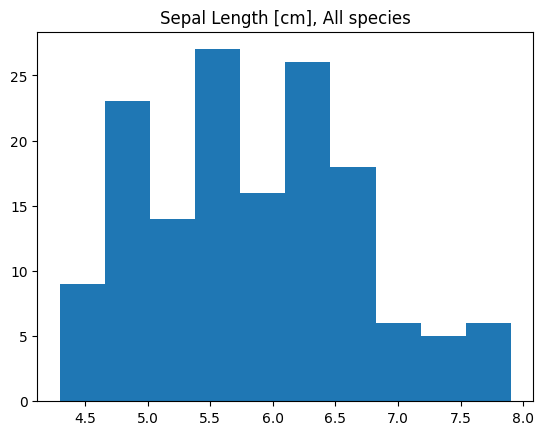

In [ ]:
plt.hist( X[:,0] ) # all species, feature 0
plt.title('Sepal Length [cm], All species')
plt.show()

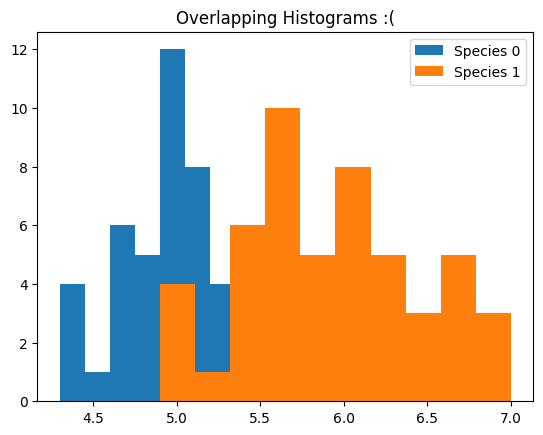

In [ ]:
plt.hist( X[y==0,0], label='Species 0' )   # column 0, species 0
plt.hist( X[y==1,0], label='Species 1' )   # column 0, species 1
plt.title('Overlapping Histograms :(')
plt.legend()
plt.show()

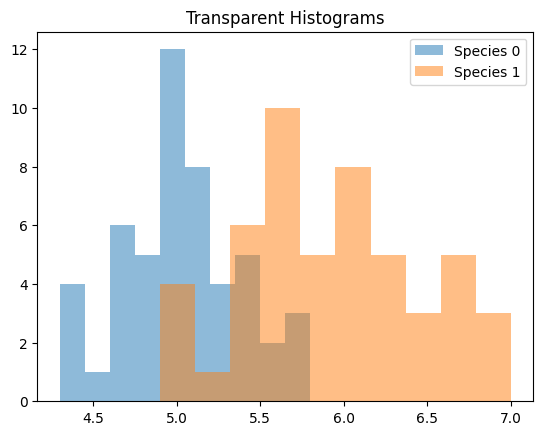

In [ ]:
plt.hist( X[y==0,0],alpha=0.5,label='Species 0' )   # column 0, species 0
plt.hist( X[y==1,0],alpha=0.5,label='Species 1')   # column 0, species 0
plt.title('Transparent Histograms')
plt.legend()
plt.show()

## Violin Plots

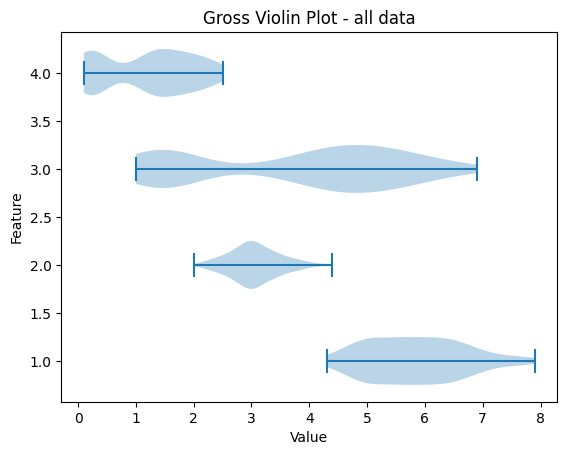

In [ ]:
plt.violinplot(X, vert=0)
plt.title('Gross Violin Plot - all data')
plt.xlabel('Value')
plt.ylabel('Feature')
plt.show()

[Violinplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.violinplot.html) are a great way to quickly visualize multiple datasets simultaneously.  Since X is a 2D array it draws each column separately as its own 'violin' with column 0 at x=1, column 1 at x=2, and so on.  We can fix this, but first we need to split up the species.

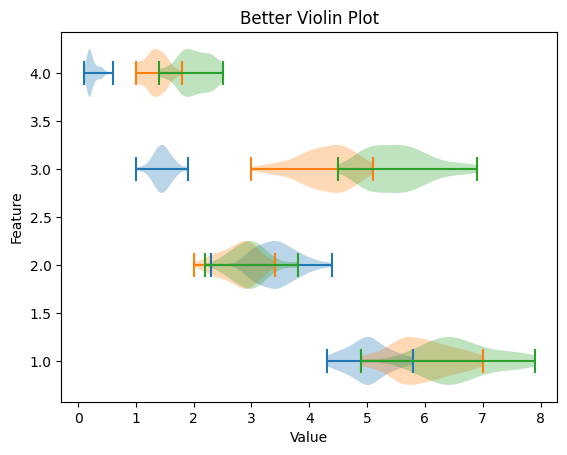

In [ ]:
plt.violinplot(X[y==0,:], vert=False)
plt.violinplot(X[y==1,:], vert=False)
plt.violinplot(X[y==2,:], vert=False)
plt.title('Better Violin Plot')
plt.xlabel('Value')
plt.ylabel('Feature')
plt.show()

Finally, here's a fancier version

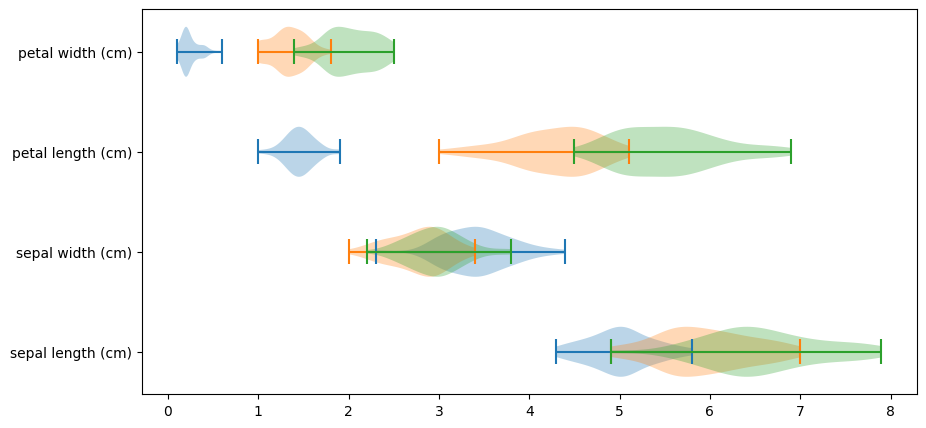

In [ ]:
plt.figure(figsize=(10,5))
featnum = np.arange(4) # locations for each feature = [0,1,2,3]
for i in range(3):
  plt.violinplot(X[y==i,:], positions=featnum, vert=False)

plt.yticks(ticks = featnum, labels=data_bunch.feature_names)
plt.show()

We see right away that some features are more **informative** than others.  All species have very similar sepal widths, but the petal length varies quite a lot.

**BONUS PLOT** with legends:

Unfortunately violin plots don't support legends, but following the time-honored tradition of copying code from stack overflow here is one solution.  It is a little clunky, but it works.

https://stackoverflow.com/questions/33864578/matplotlib-making-labels-for-violin-plots


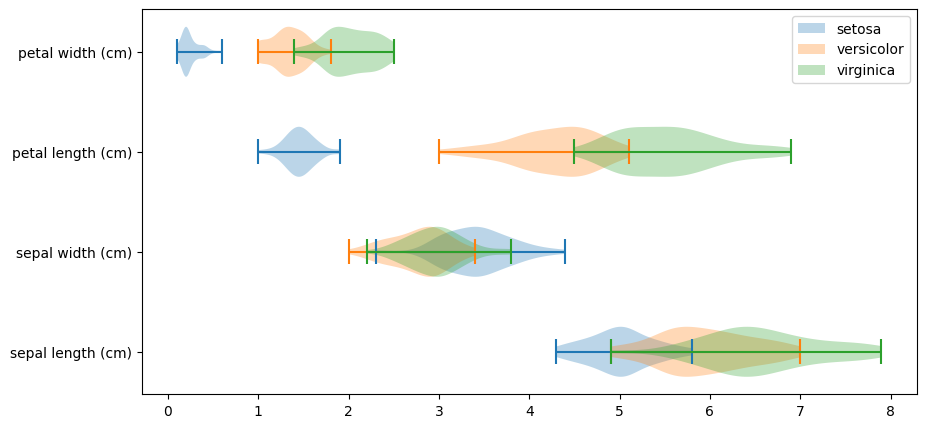

In [ ]:
#https://stackoverflow.com/questions/33864578/matplotlib-making-labels-for-violin-plots
plt.figure(figsize=(10,5))
featnum = np.arange(4) # locations for each feature = [0,1,2,3]
vp = []  # a list of violin plots
for i in range(3):
  vp.append(plt.violinplot(X[y==i,:], positions=featnum, vert=False))  # add plot to the list

plt.legend([vp[0]['bodies'][0],vp[1]['bodies'][0], vp[2]['bodies'][0]], data.target_names)  # manually create legend
plt.yticks(ticks = featnum, labels=data.feature_names)
plt.show()

# Plotting 2D Iris Data
It is very hard to visualize 4D data, but making 2D plots is easy

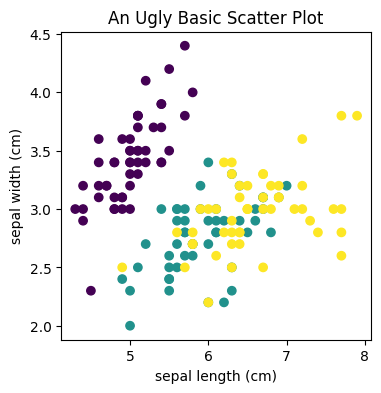

In [ ]:
featx = 0 # feature number to plot on x axis
featy = 1 # feature number to plot on y axis

plt.figure(figsize=(4,4))
plt.scatter(X[:, featx], X[:, featy], marker='o', c=y)
plt.title('An Ugly Basic Scatter Plot')
plt.xlabel(data.feature_names[featx])
plt.ylabel(data.feature_names[featy])
plt.show()

Two obvious issues:
1.  The colors are... interesting.
1.  We need a legend (which is surprisingly hard with scatter plots)

We will deal with colors first:

In [ ]:
# Define Custom Colors
colors_bold = ['#FF0000', '#00FF00', '#0000FF']
cmap_bold = ListedColormap(colors_bold)

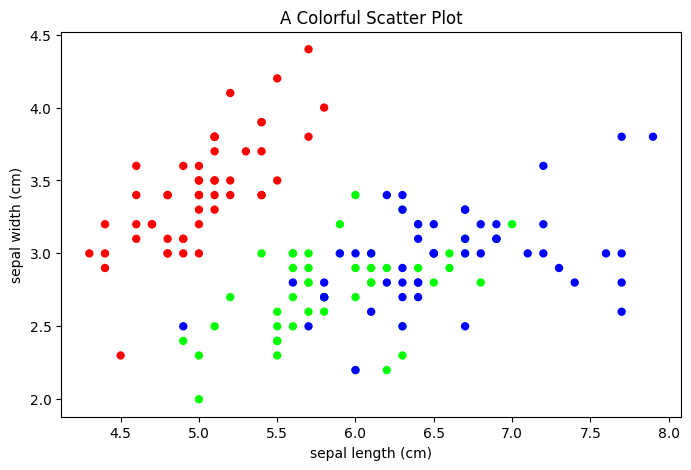

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(X[:, featx], X[:, featy], marker='o', c=y,s=25, cmap=cmap_bold) # use custom color cmap
plt.title('A Colorful Scatter Plot')
plt.xlabel(data.feature_names[featx])
plt.ylabel(data.feature_names[featy])
plt.show()

## Making Legends

Here's a few options:

1.  Use the automagic legend generator code:
https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_with_legend.html.
These get difficult to edit and control...

1.  Use scatterplots but add custom text to make a legend

1.  Semi-automatic: give up the conveinence of scatter plots and make normal plots with labels you can control

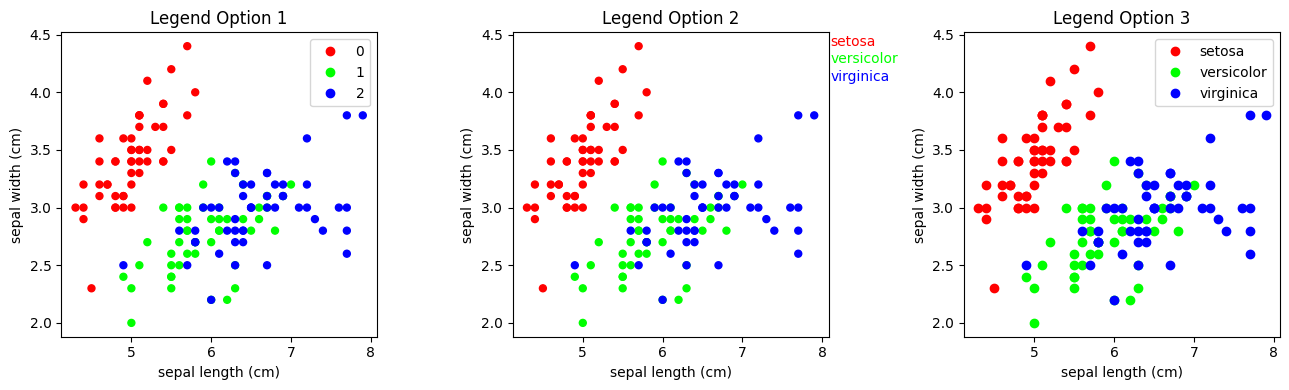

In [ ]:
# Three Ways of Making Legends
plt.figure(figsize=(13,4))

plt.subplot(1,3,1)  # Option 1
s = plt.scatter(X[:, featx], X[:, featy], marker='o', c=y,s=25, cmap=cmap_bold) # use custom color cmap
plt.legend(*s.legend_elements()) # adds scatterplot to legend
plt.title('Legend Option 1')
plt.xlabel(data.feature_names[featx])
plt.ylabel(data.feature_names[featy])


plt.subplot(1,3,2)  # Option 2
plt.scatter(X[:, featx], X[:, featy], marker='o', c=y,s=25, cmap=cmap_bold) # use custom color cmap
for i in range(3):
  plt.text(8.1,4.4-0.15*i,data.target_names[i],color=colors_bold[i]) # Make Custom Legend
plt.title('Legend Option 2')
plt.xlabel(data.feature_names[featx])
plt.ylabel(data.feature_names[featy])


plt.subplot(1,3,3)  # Option 3
NUM_CLASSES = 3
for i in range(NUM_CLASSES):
  plt.plot(X[y==i, featx], X[y==i, featy], 'o',color=colors_bold[i], label=data.target_names[i])
plt.title('Legend Option 3')
plt.xlabel(data.feature_names[featx])
plt.ylabel(data.feature_names[featy])
plt.legend()

plt.tight_layout()
plt.show()

# Summary
We now have access to a real classification project.  Your first homework assignment is to use this data to build a very simple, but actually functional, classifier.


